In [1]:
import matplotlib.pyplot as plt
import numpy as np
import edl
import plotting
import constants as C

%matplotlib widget

Sweep from pH 2.00 to 8.99. Maximum relative residual: 4.17805e-03.


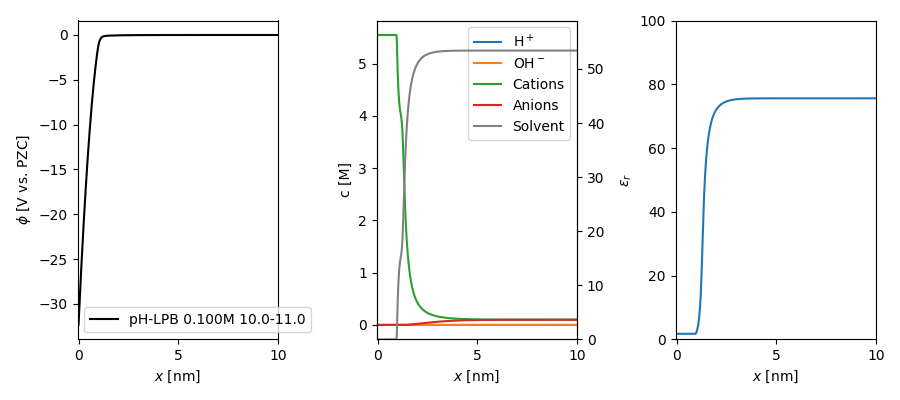

In [2]:
# support_conc = 1e-2

# model1 = edl.ProtonLPB(1e-1, (15/2.75)**3, 11, (15/2.75)**3, 11, eps_r_opt=C.EPS_R_WATER)
# model2 = edl.ProtonLPB(1e-2, (15/2.75)**3, 11, (15/2.75)**3, 11, eps_r_opt=C.EPS_R_WATER)
# model3 = edl.ProtonLPB(1e-3, (15/2.75)**3, 11, (15/2.75)**3, 11, eps_r_opt=C.EPS_R_WATER)
model1 = edl.ProtonLPB(1e-1, 5, 11, 60, 11)
model1b = edl.ProtonLPB(1e-1, 10, 11, 60, 11)
model2 = edl.ProtonLPB(1e-2, 5, 11, 60, 11)
model3 = edl.ProtonLPB(1e-3, 5, 11, 60, 11)
ins_sol = model1b.spatial_profiles_ins(p_h=9, tol=1e-2)

xmin = -0.05
xmax = 10

fig, ax = plotting.plot_solution(ins_sol, xmin, xmax, logscale=False)

plt.show()

Sweep from pH 2.00 to 0.50. Maximum relative residual: 4.21402e-10.
Sweep from pH 2.00 to 9.00. Maximum relative residual: 1.16984e-03.
Sweep from pH 2.00 to 0.50. Maximum relative residual: 4.56389e-10.
Sweep from pH 2.00 to 9.00. Maximum relative residual: 9.48536e-02.
Sweep from pH 2.00 to 0.50. Maximum relative residual: 3.99725e-10.
Sweep from pH 2.00 to 9.00. Maximum relative residual: 9.78268e-05.
Sweep from pH 2.00 to 0.50. Maximum relative residual: 3.97887e-10.
Sweep from pH 2.00 to 9.00. Maximum relative residual: 1.57344e-06.


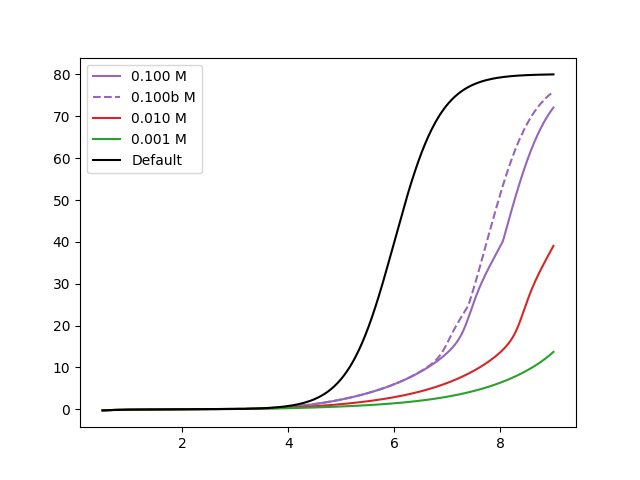

In [3]:
p_h = np.linspace(0.5, 9, 700)
sweep_sol1 = model1.sweep_ins(p_h, tol=1e-2)
sweep_sol1b = model1b.sweep_ins(p_h, tol=1e-1)
sweep_sol2 = model2.sweep_ins(p_h, tol=1e-2)
sweep_sol3 = model3.sweep_ins(p_h, tol=1e-2)

fig, ax = plt.subplots()
ax.plot(p_h, -sweep_sol1.charge * 1e2, color='tab:purple', label=f'{1e-1:.3f} M')
ax.plot(p_h, -sweep_sol1b.charge * 1e2, '--', color='tab:purple', label=f'{1e-1:.3f}b M')
ax.plot(p_h, -sweep_sol2.charge * 1e2, color='tab:red', label=f'{1e-2:.3f} M')
ax.plot(p_h, -sweep_sol3.charge * 1e2, color='tab:green', label=f'{1e-3:.3f} M')

c_h = 10 ** (-p_h)
sigma = C.E_0 * C.N_SITES_SILICA \
            * (c_h**2 - C.K_SILICA_A * C.K_SILICA_B) \
            / (C.K_SILICA_A * C.K_SILICA_B + C.K_SILICA_B * c_h + c_h**2)
ax.plot(p_h, -sigma * 1e2, color='black', label=f'Default')

ax.legend()

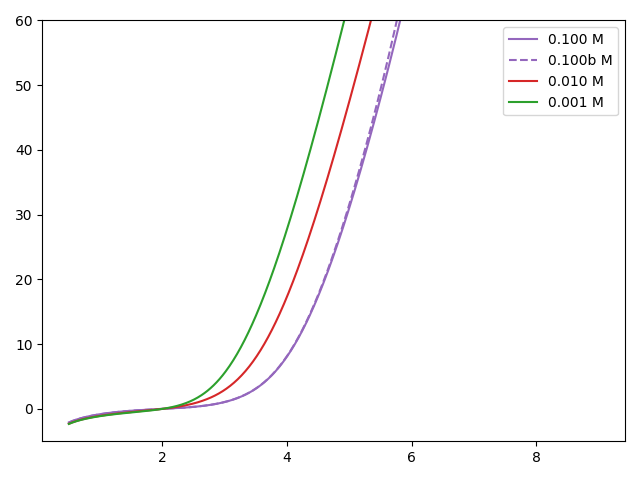

In [4]:
fig, ax = plt.subplots()

ax.plot(p_h, -sweep_sol1.phi * 1e3, color='tab:purple', label=f'{1e-1:.3f} M')
ax.plot(p_h, -sweep_sol1b.phi * 1e3, '--', color='tab:purple', label=f'{1e-1:.3f}b M')
ax.plot(p_h, -sweep_sol2.phi * 1e3, color='tab:red', label=f'{1e-2:.3f} M')
ax.plot(p_h, -sweep_sol3.phi * 1e3, color='tab:green', label=f'{1e-3:.3f} M')

ax.set_ylim([-5, 60])
# ax.set_xlim([1, 5])

ax.legend()
plt.tight_layout()

In [5]:
# to do: research how big ptilde * y[1, :] is 

max_py1 = np.max(-model1b.p_tilde * ins_sol.efield * C.BETA * C.Z * C.E_0 / model1b.kappa_debye)
max_y0 = np.max(-ins_sol.phi * C.BETA * C.Z * C.E_0)
print(max_py1, max_y0)
print(np.exp(max_py1)/max_py1, np.exp(max_y0), np.exp(-max_y0))
# py1 and y0 are comparable in magnitude

# write down asymptotic ODE/number densities for large y[1, :]
# implement in code

186.3584623978136 1259.8272908727054
4.614267381301245e+78 inf 0.0


C:\Users\lucas\AppData\Local\Temp/ipykernel_16964/2231179469.py:6: RuntimeWarning: overflow encountered in exp
  print(np.exp(max_py1)/max_py1, np.exp(max_y0), np.exp(-max_y0))


In [6]:
import constants as C
a = 2.75e-10
nref = 1/a ** 3
k = np.sqrt(2*nref*C.E_0**2*C.BETA/C.EPS_0)
1/k * 1e9

0.0038409934922584697